### <center> Fuel Consumption Prediction Using Machine Learning

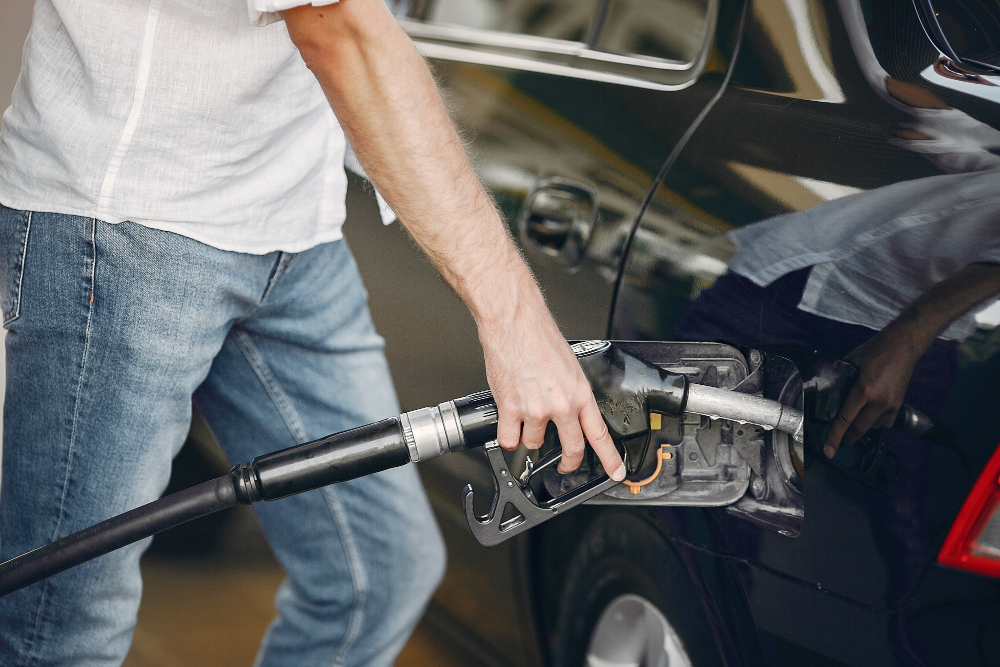

In this project we processing and exploring a large amount of data on Fuel Consumption.This dataset provide model-specific fuel 
 consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. To help you compare vehicles from different model years, the fuel consumption ratings for 2000 to 2022 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

##### You can download the dataset from the link given below
##### https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Loading the Dataset

In [2]:
data=pd.read_csv("./Fuel_Consumption.csv")
data

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


#### Data Exploration

In [3]:
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
data.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [5]:
data.sample(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
13274,2014,BMW,320i,COMPACT,2.0,4,M6,Z,9.1,5.6,7.5,38,173
6310,2007,HYUNDAI,TIBURON,SUBCOMPACT,2.0,4,M5,X,10.2,7.1,8.8,32,202
12253,2013,BMW,ACTIVEHYBRID 3,COMPACT,3.0,6,A8,Z,8.0,5.9,7.1,40,163
8993,2010,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM6,Z,15.4,9.9,12.9,22,297
12099,2012,TOYOTA,TACOMA 4WD,PICKUP TRUCK - SMALL,4.0,6,A5,X,13.1,9.8,11.7,24,269
4259,2005,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.3,3.6,78,83
8459,2009,JEEP,COMMANDER 4X4 (MDS),SUV,5.7,8,A5,X,15.7,10.6,13.4,21,308
10384,2011,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,A6,X,12.9,8.9,11.1,25,255
17464,2017,TOYOTA,CAMRY,MID-SIZE,3.5,6,AS6,X,11.0,7.8,9.6,29,224
3210,2004,FORD,GRAND MARQUIS,FULL-SIZE,4.6,8,A4,X,13.9,8.7,11.6,24,267


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [7]:
data.shape

(22556, 13)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [9]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

##### Renaming the Columns

In [10]:
data.rename(columns={"VEHICLE CLASS":"VehicleClass","ENGINE SIZE":"EngineSize","FUEL CONSUMPTION":"FuelConsumption","HWY (L/100 km)":"FuelConsumptionHWY","COMB (L/100 km)":"FuelConsumptionComb","COMB (mpg)":"FuelConsumptionComb_mpg","EMISSIONS":"CO2Emissions"},inplace=True)

##### Checking the null values

In [11]:
data.isnull().mean()*100

YEAR                       0.0
MAKE                       0.0
MODEL                      0.0
VehicleClass               0.0
EngineSize                 0.0
CYLINDERS                  0.0
TRANSMISSION               0.0
FUEL                       0.0
FuelConsumption            0.0
FuelConsumptionHWY         0.0
FuelConsumptionComb        0.0
FuelConsumptionComb_mpg    0.0
CO2Emissions               0.0
dtype: float64

In [15]:
data.duplicated().sum()

0

In [16]:
data.drop_duplicates(inplace=True)

#### Univariate Analysis

##### Histogram

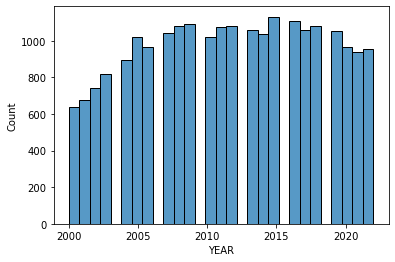

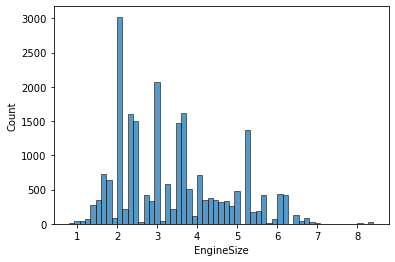

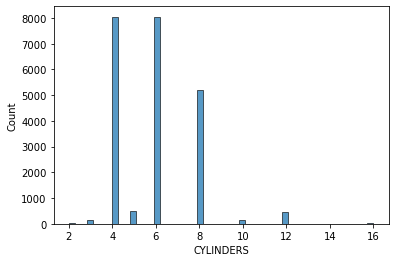

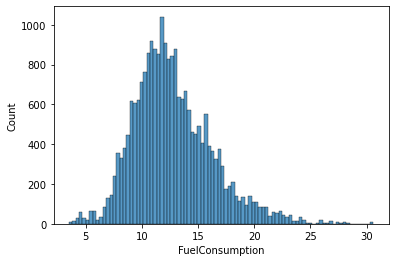

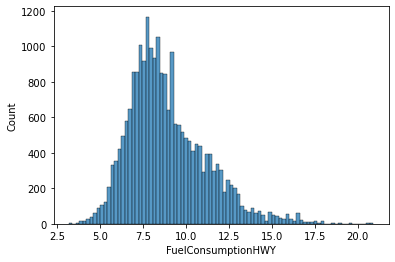

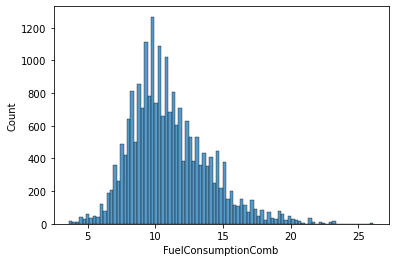

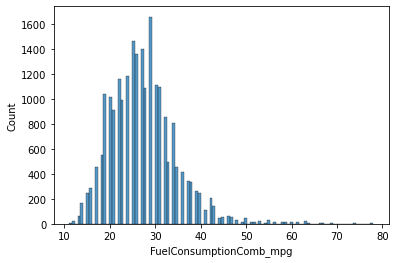

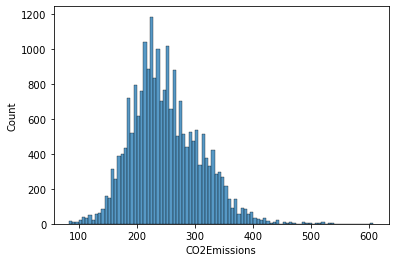

In [17]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i])
        plt.show()

##### KDE Plot

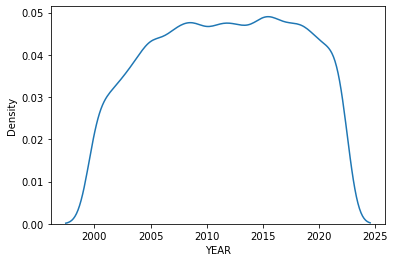

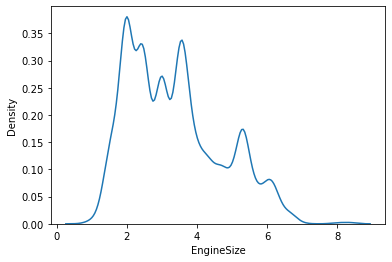

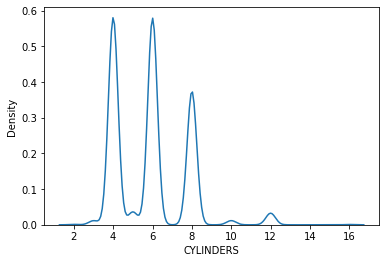

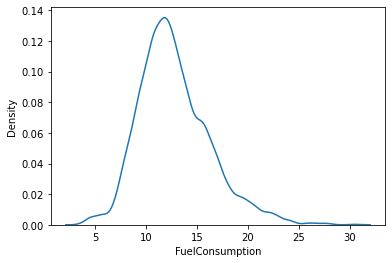

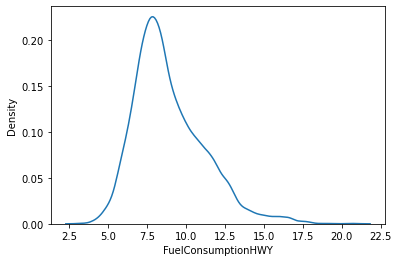

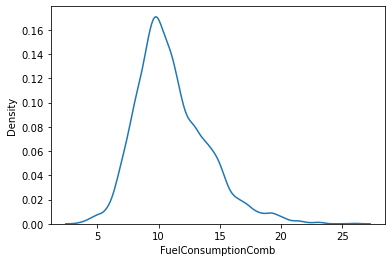

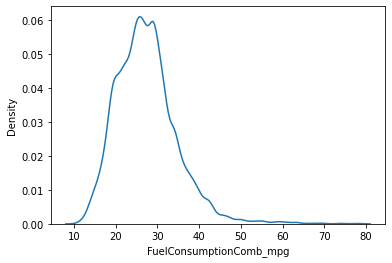

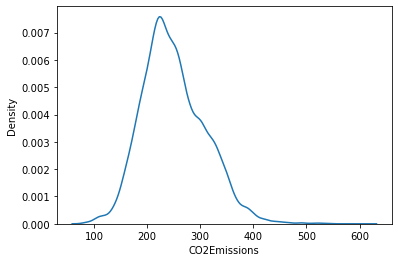

In [18]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

##### Box Plot

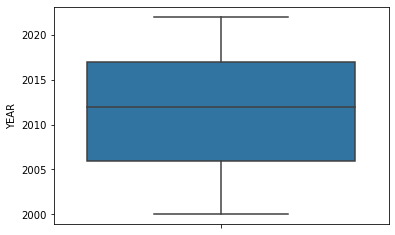

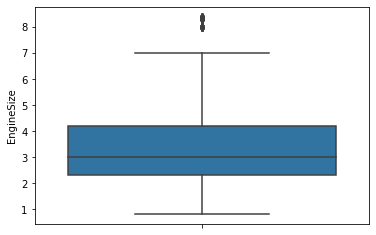

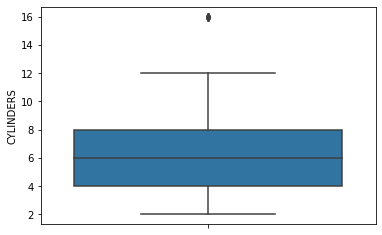

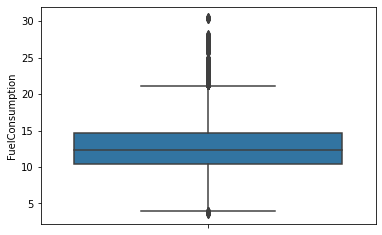

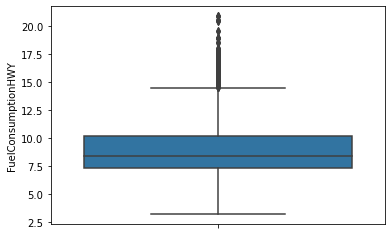

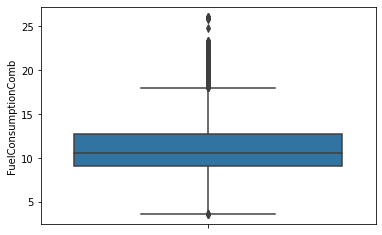

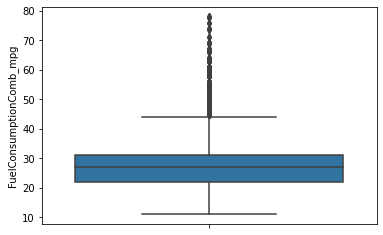

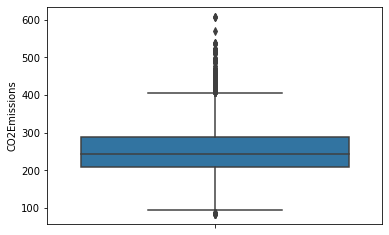

In [19]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

#### Outlier Treatment

In [34]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [35]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])
        

##### After the Outlier treatment  drop the null values

In [36]:
data.dropna(inplace=True)

###### Now again plot the Bar Plot

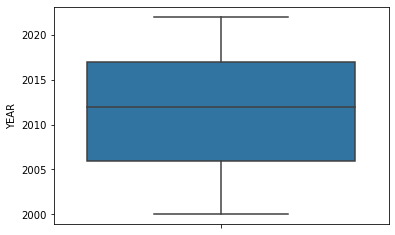

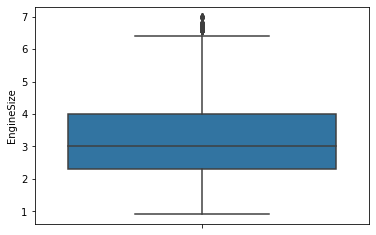

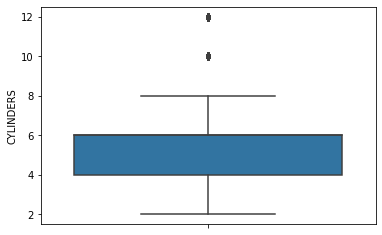

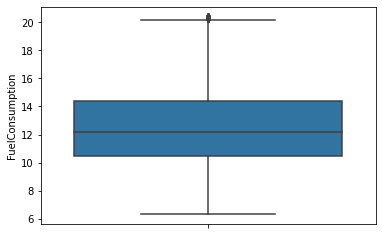

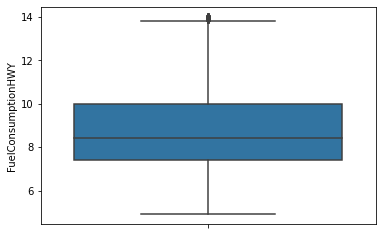

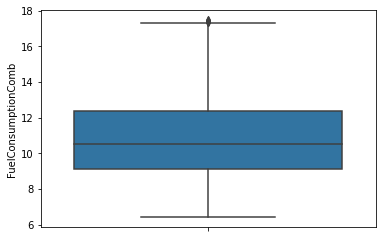

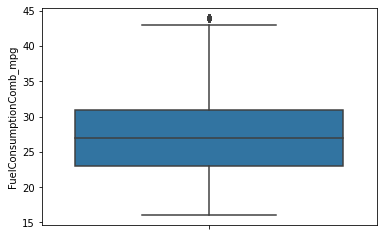

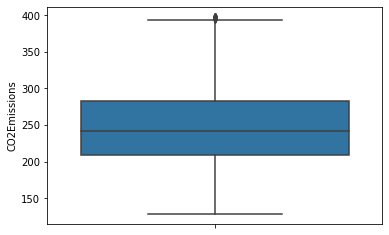

In [37]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

### Multivariate Analysis

##### Bar Chart

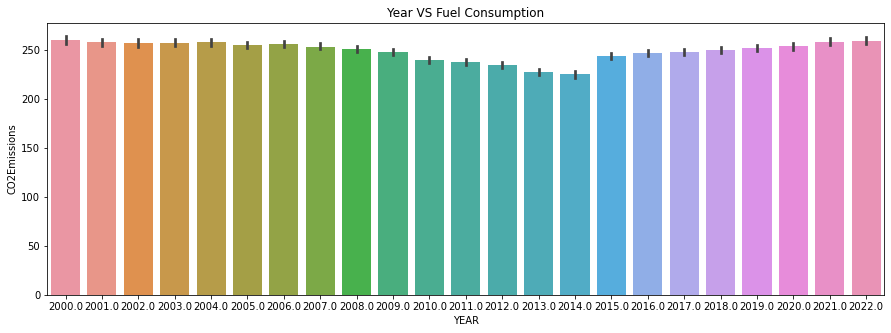

In [40]:
plt.figure(figsize=(15,5))
plt.title('Year VS CO2 Emissions')
sns.barplot(x= 'YEAR', y= 'CO2Emissions', data=data);

##### Pie Chart

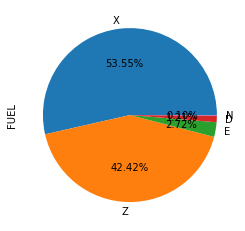

In [43]:
data.FUEL.value_counts().plot.pie(autopct="%1.2f%%");

In [ ]:
data.info()

##### Line Chart

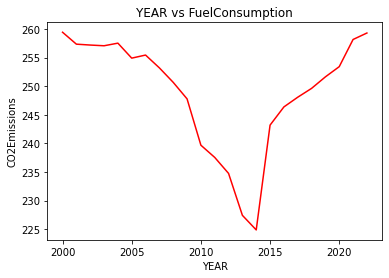

In [45]:
sns.lineplot(data=data,x="YEAR",y="CO2Emissions",color="Red",ci=None);
plt.title("YEAR vs CO2 Emissions");

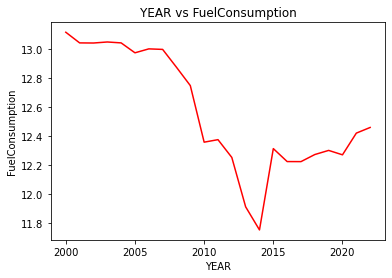

In [46]:
sns.lineplot(data=data,x="YEAR",y="FuelConsumption",color="Red",ci=None);
plt.title("YEAR vs FuelConsumption");

##### Pair Plot

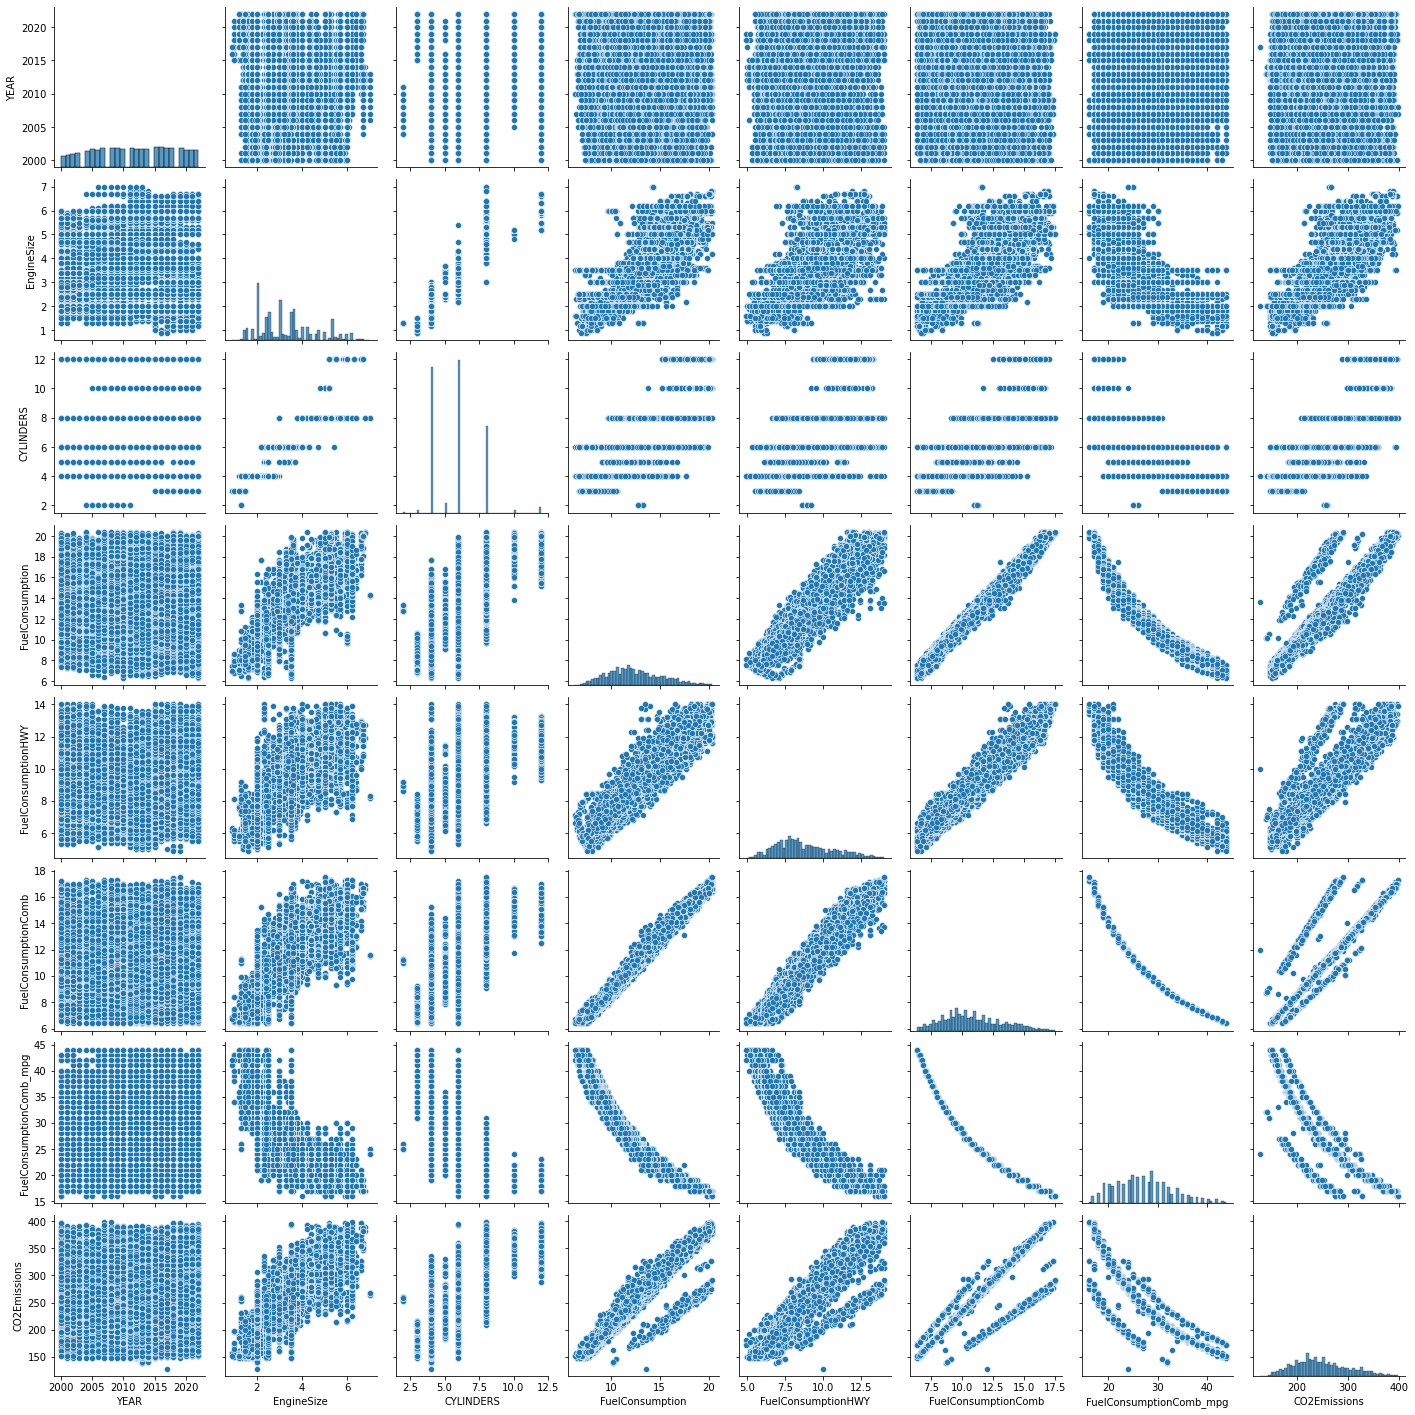

In [48]:
sns.pairplot(data=data);

#### Label Encoding

In [49]:
le = LabelEncoder()

In [50]:
data["MAKE"]=le.fit_transform(data["MAKE"])
data["MODEL"]=le.fit_transform(data["MODEL"])
data["VehicleClass"]=le.fit_transform(data["VehicleClass"])
data["TRANSMISSION"]=le.fit_transform(data["TRANSMISSION"])
data["FUEL"]=le.fit_transform(data["FUEL"])

#### Let's check the correlation of  other variables with the target variable "Fule Consumption"

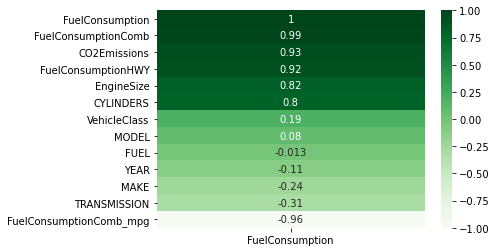

In [52]:
sns.heatmap(data.corr()[["FuelConsumption"]].sort_values(by="FuelConsumption",ascending=False),vmin=-1,vmax=1,annot=True,cmap="Greens");

#### Let's take only the variables which has good correlation with the target variable "FuleConsumption"

In [53]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VehicleClass', 'EngineSize', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FuelConsumption', 'FuelConsumptionHWY',
       'FuelConsumptionComb', 'FuelConsumptionComb_mpg', 'CO2Emissions'],
      dtype='object')

In [55]:
x=data[["FuelConsumptionComb","CO2Emissions","FuelConsumptionHWY","EngineSize","CYLINDERS","VehicleClass","MODEL"]].values
y=data[["FuelConsumption"]].values

#### Scaling

In [56]:
sc = StandardScaler()

In [57]:
x=sc.fit_transform(x)

In [58]:
models ={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegresssor":DecisionTreeRegressor(),
    "LinearSvr":LinearSVR(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [59]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse =np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("AVG RMSE : ",rmse_avg)
    print("*"*100)

cross validation model : LinearRegression
AVG RMSE :  0.0803796478084301
****************************************************************************************************
cross validation model : RidgeRegression
AVG RMSE :  0.08041960264076349
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVG RMSE :  0.4144347819413993
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVG RMSE :  0.18965758980337158
****************************************************************************************************
cross validation model : DecisionTreeRegresssor
AVG RMSE :  0.12447916425561309
****************************************************************************************************
cross validation model : LinearSvr
AVG RMSE :  0.08054084576960821
*********************************************

#### Since The Linear Regression Model has minimum rmse value. So select Linear Regression as the model

In [60]:
model=LinearRegression()

##### Split the datase into training and testing data

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [62]:
model.fit(x_train,y_train)

LinearRegression()

###### We can check the efficiency of the model

In [63]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
R2_score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",R2_score)
print("training_score: ",training_score)
print("testing_score: ",testing_score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2score:  99.92687964341364
training_score:  99.91294610244412
testing_score:  99.92687964341364
mae:  0.05412577114486649
mse:  0.005972966363891763
rmse:  0.07728496855075871


###### Predicting values using the model

In [64]:
y_pred=model.predict(x)

###### After predicting we can compare it with the actual value

In [65]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("actual","predicted"),dtype="float")
OUTPUT.head()

,actual,predicted
0,9.2,9.247906
1,8.5,8.508893
2,12.2,12.113378
3,13.4,13.376758
4,10.0,9.906774


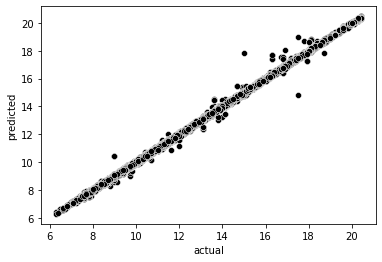

In [66]:
sns.scatterplot(data=OUTPUT,x="actual",y="predicted",color="Black");

##### We can Check the score of the model

In [67]:
model.score(x,y)*100

99.91577484186628